# Analisis exploratorio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar los datos

In [3]:
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')
books = pd.read_csv('Books.csv')

C:\Users\Alien Ware\AppData\Local\Temp\ipykernel_18548\1153688924.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
print(users.info())
print(ratings.info())
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 2713

In [9]:
print(users.describe())
print(ratings.describe())
print(books.describe())


            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271359               271360   
unique      271360          242135           102023                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

### Revisar datos de users

In [12]:
print(users.isna().sum())
print(len(users))

User-ID          0
Location         0
Age         110762
dtype: int64
278858


In [14]:
users = users.dropna(subset=["Age"])


In [17]:
users.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [21]:
users['Country'] = users['Location'].str.split(',')

In [30]:
users['len(country)'] = users['Country'].apply(len)

In [49]:
users['RealCountry'] = users['Country'].apply(lambda x: x[-1].strip() if isinstance(x, list) else None)

In [55]:
users = users[users['RealCountry'].apply(len) >= 2]

In [67]:
users = users.drop(columns = ['Country', 'len(country)'], axis=1)

In [75]:
users = users[users['Age']<100]
users['Age'].describe()

count    165725.000000
mean         34.567675
std          13.807486
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          99.000000
Name: Age, dtype: float64

<AxesSubplot:>

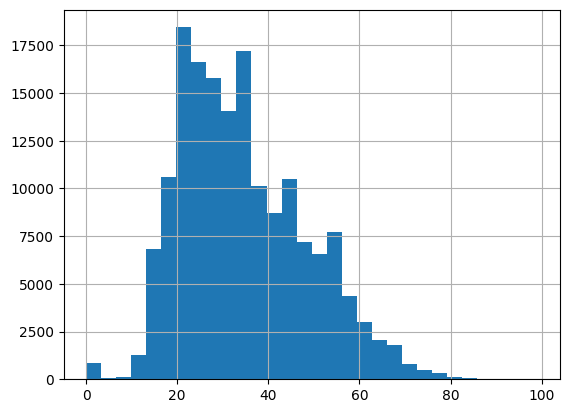

In [77]:
users['Age'].hist(bins = 30)

### Ver información de ratings

In [93]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [98]:
print(len(ratings))
ratings['ISBN'].nunique()

1149780


340556

In [96]:
ratings['Book-Rating'].nunique()


11

<AxesSubplot:>

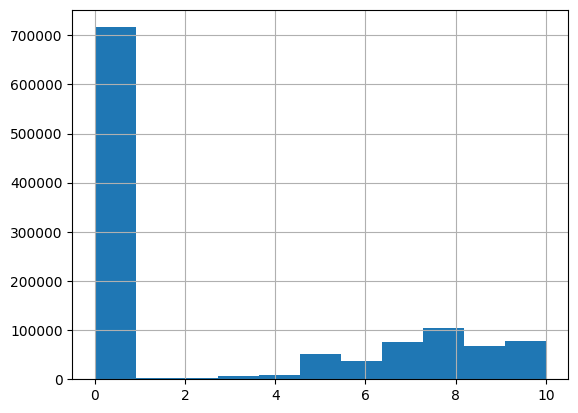

In [97]:
ratings['Book-Rating'].hist(bins=11)

### Información de libros

In [100]:
print(books['ISBN'].nunique())
print(books['Book-Author'].nunique())
print(books['Publisher'].nunique())

271360
102023
16807


In [104]:
books.isna().sum()
books = books.dropna()

### Ver información de todo

In [105]:
users_ratings = pd.merge(left=users, right=ratings, on='User-ID', how='inner')

In [106]:
users_ratings_books = pd.merge(left=users_ratings, right=books, on='ISBN', how = 'inner')

In [107]:
users_ratings_books = users_ratings_books.drop(columns = ['Image-URL-S','Image-URL-M', 'Image-URL-L'], axis=1)

In [108]:
users_ratings.to_csv('users_ratings.csv')
users_ratings_books.to_csv('users_ratings_books.csv')


In [110]:
print('users columns', users.columns)
print('ratings columns', ratings.columns)
print('books columns', books.columns)

users columns Index(['User-ID', 'Location', 'Age', 'RealCountry'], dtype='object')
ratings columns Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
books columns Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
